In [1]:
from wsmtk.modis import MODISwindow,MODIStiles
from wsmtk.utils import aoi2ix
from wsmtk.hdf5 import h5_file,h5_readArr
import numpy as np
import re
import glob
import os
import gdal
import tables
import h5py
import datetime
from matplotlib import pyplot as plt
%config Completer.use_jedi=False

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
aoi = [-2.746470,7.897562,7.610793,12.939542]

In [3]:
if len(aoi) is 4:
        aoi = [aoi[i] for i in [0,3,2,1]]

In [4]:
aoi

[-2.74647, 12.939542, 7.610793, 7.897562]

In [5]:
#tras = gdal.Open('/data/code/tmp/wsmtk/wsmtk/data/MODIS_TILES.tif')

In [40]:
tiles = MODIStiles(aoi)

In [41]:
tiles.tiles

['h17v07', 'h17v08', 'h18v07', 'h18v08']

In [8]:
tiles.tiles.sort()

In [37]:
tiles.tiles

['h17v07', 'h17v08', 'h18v07', 'h18v08']

In [10]:
tiles.aoi

[-2.74647, 12.939542, 7.610793, 7.897562]

In [11]:
tileRX = re.compile('|'.join(tiles.tiles))

In [12]:
class args:
    prcdir = '/data/modistest/processed/SINPROJ/VIM/'
    datemin = datetime.date(2000,1,1).strftime("%Y%m")
    datemax = datetime.date.today().strftime("%Y%m")
        

In [13]:
h5files = [y for x in os.walk(args.prcdir) for y in glob.glob(os.path.join(x[0], '*.h5')) if re.search(tileRX,y)]

In [14]:
h5files

['/data/modistest/processed/SINPROJ/VIM/MOD13A2.h17v08.006_VIM.h5',
 '/data/modistest/processed/SINPROJ/VIM/MOD13A2.h18v08.006_VIM.h5',
 '/data/modistest/processed/SINPROJ/VIM/MOD13A2.h18v07.006_VIM.h5',
 '/data/modistest/processed/SINPROJ/VIM/MOD13A2.h17v07.006_VIM.h5']

In [15]:
win = MODISwindow(aoi=aoi,datemin=args.datemin,datemax=args.datemax,files=h5files)

In [30]:
with h5py.File(h5files[0],'r') as h5f:
    dat = h5f.get('Raw')
    #self.resolution = dat.attrs['Resolution']
    gt = dat.attrs['Geotransform']
    #lf.pj = dset.attrs['Projection']
    print(dat.shape)
    dat = None
    #dts = h5f.get('Dates')[...]

(1200, 1200, 6)


In [45]:
[x for x in h5files if 'h17v07' in x][0]

'/data/modistest/processed/SINPROJ/VIM/MOD13A2.h17v07.006_VIM.h5'

In [31]:
gt

array([-1.11195052e+06,  9.26625433e+02,  0.00000000e+00,  1.11195052e+06,
        0.00000000e+00, -9.26625433e+02])

In [90]:
v = list(set([re.sub('h(\d+)v(\d+)','\\1',x) for x in tiles.tiles]))

In [91]:
v.sort()

In [98]:
[x.split('v') for x in tiles.tiles]

[['h17', '07'], ['h17', '08'], ['h18', '07'], ['h18', '08']]

In [95]:
[x for x,y in enumerate(v) if '19' in y]

[]

In [ ]:
arr = np.zeros((win.height,win.width,sum(win.ix)),dtype='float32')

In [ ]:
f = h5files[3]

In [ ]:
h5f = h5_file(f)

xr,xrd,yr,yrd = aoi2ix(h5f.bbox(),aoi,h5f.res)

xw,xwd,yw,ywd = aoi2ix(aoi,h5f.bbox(),h5f.res)

arr[yw:(yw+ywd),xw:(xw+xwd),...] = h5_readArr(f,xr,xrd,yr,yrd,np.flatnonzero(win.ix),'Raw')


In [ ]:
plt.imshow(arr[...,4])

In [ ]:
driver = gdal.GetDriverByName('GTiff')
r = driver.Create('/data/modistest/processed/Rpack/python.tif', win.width, win.height, 1, gdal.GDT_Float32)
r.SetGeoTransform(win.geotransform)
r.SetProjection(win.projection)
rb = r.GetRasterBand(1)
rb.WriteArray(arr[...,0])
rb.FlushCache()
rb = None
r = None

In [14]:
driver = gdal.GetDriverByName('GTiff')

In [15]:
arr = np.random.rand(win.height,win.width)

In [16]:
arr.shape

(609, 1252)

In [17]:
r = driver.Create('/vsimem/inmem.tif', win.width, win.height, 1, gdal.GDT_Float32)

In [18]:
r.SetGeoTransform(win.geotransform)

0

In [19]:
r.SetProjection(win.projection)

0

In [20]:
r.GetRasterBand(1).WriteArray(arr, 0,0)

0

In [21]:
r.ReadAsArray()

array([[2.93213129e-01, 7.82648623e-02, 9.57813978e-01, ...,
        1.09374754e-01, 4.35826242e-01, 6.18767180e-03],
       [3.31474185e-01, 9.96534944e-01, 8.32356036e-01, ...,
        3.66720967e-02, 3.03178340e-01, 2.07442194e-01],
       [1.38511300e-01, 6.82008624e-01, 8.23919594e-01, ...,
        2.96724051e-01, 3.79101455e-01, 4.48631197e-02],
       ...,
       [6.66299045e-01, 8.64915773e-02, 3.50262910e-01, ...,
        1.00952372e-01, 5.92632413e-01, 8.40541184e-01],
       [7.39295006e-01, 6.65696740e-01, 9.90009427e-01, ...,
        6.70112371e-01, 5.88356674e-01, 2.95122973e-05],
       [9.84063387e-01, 6.05283499e-01, 6.11025035e-01, ...,
        2.22252220e-01, 3.16561937e-01, 1.53902739e-01]], dtype=float32)

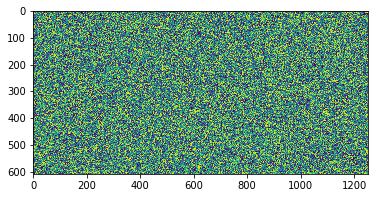

In [22]:
plt.imshow(r.ReadAsArray())

In [23]:
r = None

In [24]:
gdal.Unlink('/vsimem/inmem.tif')

0

1.12